In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

1. We want to generate a report indicating whether each shipment was scheduled to be picked up on time and who was responsible if it was late. Transform the data into a format that makes sense.
2. Once you have transformed the data, demonstrate how you would present it in a report. This should be some combination of actual tables or data visualizations.
3. Again using the tracking activity data, format the data to help you determine whether any of the responsible parties produce longer delays in pickup or delivery times. Assume that this is just a small subset of the overall data, so don't worry about interpreting the results for the sample data.
4. Describe the limitations of extending any of your implementations of transforming, presenting, or analyzing the dataset. 

In [2]:
#load data
data = pd.read_csv('./tracking_activity.csv')

delay = pd.read_csv('./shipping_delay.csv')
delay = delay.rename(columns={'Unnamed: 1': 'original_schedule', 'TRUE': 'delay_schedule'})
                                                   
parties = pd.read_csv('./responsible_parties.csv')
parties = parties[['shipment_id', 'Party']]

In [3]:
#format column types
data['scheduled_date'] = pd.to_datetime(data['scheduled_date'])

In [4]:
delay

,shipment_id,original_schedule,delay_schedule,Delay,Late
0,163831,2018-08-10,2018-08-13,3.0,True
1,163966,2018-08-10,2018-08-13,3.0,True
2,163979,2018-08-16,NaN,NaN,False
3,163981,2018-08-13,NaN,NaN,False
4,164092,2018-08-10,2018-08-14,4.0,True
5,164106,2018-08-13,2018-08-14,1.0,True
6,164113,2018-08-10,NaN,NaN,False
7,164143,2018-08-10,NaN,NaN,False
8,164153,2018-08-13,2018-08-14,1.0,True
9,164159,2018-08-13,2018-08-13,0.0,True


# Data Analysis

### Late vs On-time shipments

<AxesSubplot:title={'center':'Count of late vs ontime shipments'}, xlabel='Late', ylabel='count'>

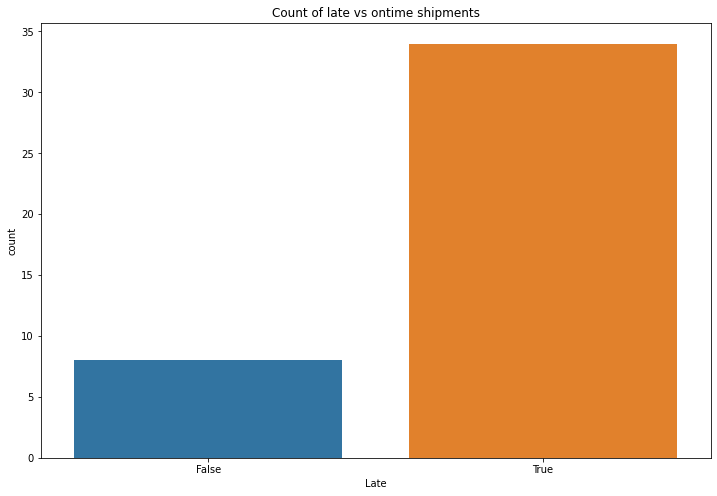

In [21]:
plt.figure(figsize=(12,8))
plt.title('Count of late vs ontime shipments')
plt.xlabel('Responsible Party')
plt.ylabel('Late  pickups')

sns.countplot(x='Late', data=delay)

In [6]:
shipping_count = delay.groupby(['Late']).count().rename(columns={'shipment_id': 'count'})
shipping_count[['count']]

,count
Late,
False,8
True,34


Only 19% of shipments have not been delayed while 81% have had delay.

### How many late shipments by each party

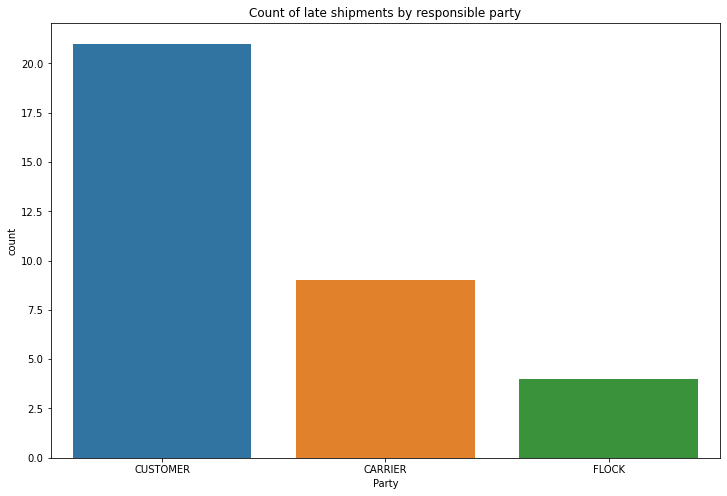

In [20]:
plt.figure(figsize=(12,8))
plt.title('Count of late shipments by responsible party')
plt.xlabel('Responsible Party')
plt.ylabel('Late  pickups')

ax = sns.countplot(x="Party", data=parties)

In [8]:
#amount of shipments late by party
party_count = parties.groupby(['Party']).count().rename(columns={'shipment_id': 'count'})

party_count['count'] = pd.to_numeric(party_count['count'])

total_delays = party_count.sum().astype(int)

party_count['percentage'] = 0.0

#find percentage of late shipments by party
for ind in party_count.index:
    
    party_count['percentage'][ind] =  party_count['count'][ind]  / total_delays
    
    
party_count

/home/derek/anaconda3/envs/analytics/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,count,percentage
Party,,
CARRIER,9,0.264706
CUSTOMER,21,0.617647
FLOCK,4,0.117647


Customers are often the responsible party for late shipments by over 50% of total incidents (21 out of 34 late shipments).

## Distribution of delayed shipments

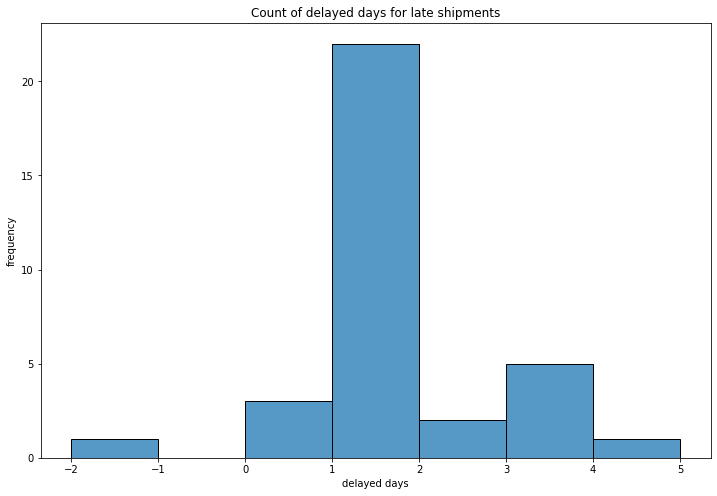

In [19]:
plt.figure(figsize=(12,8))
plt.title('Count of delayed days for late shipments')
plt.xlabel('delayed days')
plt.ylabel('frequency')

ax = sns.histplot(x=delay['Delay'], bins=7, binrange=[-2,5])

In [10]:
delay_count = delay['Delay'].value_counts()

delay_count

 1.0    22
 3.0     5
 0.0     3
 2.0     2
-2.0     1
 4.0     1
Name: Delay, dtype: int64

Delayed shipments are generally late by 1 day (22 shipments). Some shipments marked delay have the same scheduled date as the orignal (possible error or delayed in hour time frame). One shipment's orignal pickup schedule is later than the marked delayed scheduled pickup.

## Delay frequency of each party

In [12]:
#join delay time table with late shipments

party_delay = pd.merge(left=parties, 
                       right=delay, 
                       left_on='shipment_id', 
                       right_on='shipment_id')


party_delay = party_delay[['shipment_id', 'Party', 'Delay']]

party_delay

,shipment_id,Party,Delay
0,163831,CUSTOMER,3.0
1,163966,CARRIER,3.0
2,164092,CUSTOMER,4.0
3,164106,CARRIER,1.0
4,164153,CUSTOMER,1.0
5,164159,CUSTOMER,0.0
6,164172,CARRIER,3.0
7,164200,CUSTOMER,3.0
8,164211,CUSTOMER,0.0
9,164218,CUSTOMER,1.0


<AxesSubplot:xlabel='Delay', ylabel='Count'>

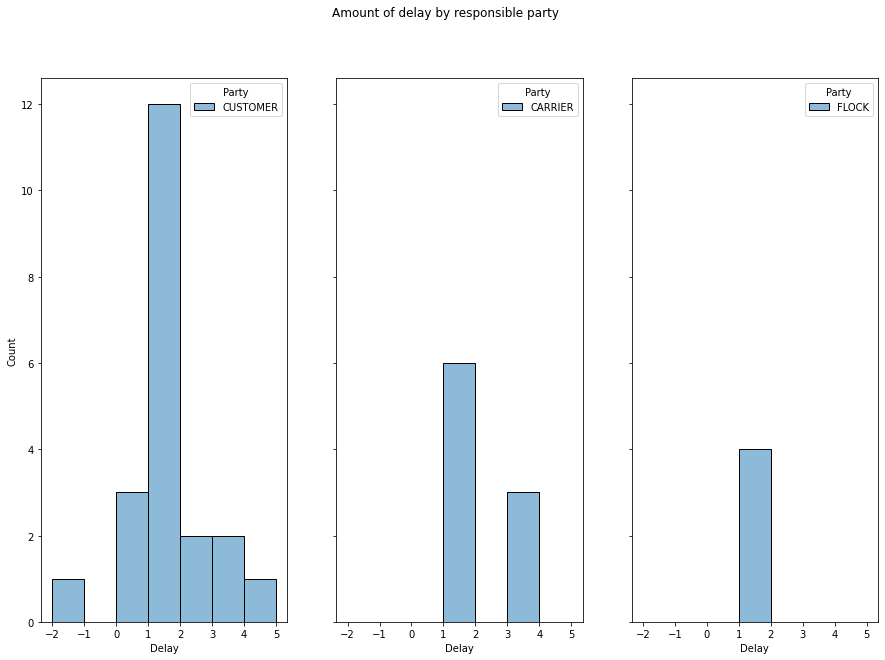

In [13]:
#compare frequency of delay times of shipments by responsible party
customer = party_delay.loc[party_delay['Party'] == 'CUSTOMER']
carrier = party_delay.loc[party_delay['Party'] == 'CARRIER']
flock = party_delay.loc[party_delay['Party'] == 'FLOCK']


fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True, sharex=True)
fig.suptitle('Amount of delay by responsible party')

sns.histplot(customer, x='Delay', hue='Party', ax=axes[0], bins=7, binrange=[-2,5])
sns.histplot(carrier, x='Delay', hue='Party', ax=axes[1], bins=7, binrange=[-2,5])
sns.histplot(flock, x='Delay', hue='Party', ax=axes[2], bins=7, binrange=[-2,5])

In [18]:
customer_delay = customer['Delay'].sum()
carrier_delay = carrier['Delay'].sum()
flock_delay = flock['Delay'].sum()

party_delays = [customer_delay, carrier_delay, flock_delay]

total_delay = customer_delay + carrier_delay + flock_delay

print('There is a cumalative delay of', total_delay, 'days across all parties\n')

print('customer has a cumulative delay of', party_delays[0], '(', round(party_delays[0]/total_delay,2) ,'percent of total )' )
print('carrier has a cumulative delay of', party_delays[1], '(', round(party_delays[1]/total_delay,2) ,'percent of total )' )
print('flock has a cumulative delay of', party_delays[2], '(', round(party_delays[2]/total_delay,2) ,'percent of total )' )


There is a cumalative delay of 43.0 days across all parties

customer has a cumulative delay of 24.0 ( 0.56 percent of total )
carrier has a cumulative delay of 15.0 ( 0.35 percent of total )
flock has a cumulative delay of 4.0 ( 0.09 percent of total )


## Outlier analysis

In [15]:
#this id has a marked delay but delay time is calculated 0
sample = data.loc[data['shipment_id'] == 164331]
sample 

,shipment_id,tracking_activity_id,created_on,tracking_activity_type,scheduled_date,responsible_party,pickup_is_late
104,164331,415310,2018-08-13 21:24:14,PICKUP_SCHEDULED,2018-08-14,NaN,NaN
105,164331,415311,2018-08-13 21:24:14,DELIVERY_ESTIMATED,2018-08-16,NaN,NaN
106,164331,415313,2018-08-13 21:24:40,PICKUP_SCHEDULED,2018-08-14,CUSTOMER,True
107,164331,415316,2018-08-13 21:25:22,DELIVERY_ESTIMATED,2018-08-15,CUSTOMER,NaN


apparently orignal scheduled pickup date is same as the delayed scheduled date.

In [16]:
#this id has a calculated delay time of -2
sample = data.loc[data['shipment_id'] == 164793]
sample

,shipment_id,tracking_activity_id,created_on,tracking_activity_type,scheduled_date,responsible_party,pickup_is_late
19,164793,415652,2018-08-14 2:33:39,PICKUP_SCHEDULED,2018-08-15,NaN,NaN
20,164793,415653,2018-08-14 2:33:39,DELIVERY_ESTIMATED,2018-08-17,NaN,NaN
21,164793,415654,2018-08-14 2:34:48,PICKUP_SCHEDULED,2018-08-13,CUSTOMER,True
22,164793,415655,2018-08-14 2:35:36,DELIVERY_ESTIMATED,2018-08-15,CUSTOMER,NaN
23,164793,415656,2018-08-14 2:36:20,PICKUP_SCHEDULED,2018-08-13,CUSTOMER,True
24,164793,415657,2018-08-14 2:36:36,DELIVERY_ESTIMATED,2018-08-15,CUSTOMER,NaN


the orignal scheduled pickup date is earlier than the delayed scheduled date. This may be a logging error

##  limitations of data analysis

I have never used google sheets before while conducting data analysis. I had to learn how to use google sheets' tools to manipulate and conduct querires on the tables to grab the data I needed. I used pivot tables for the most part. I could not find out how to merge my tables together in google sheets, so I created two tables that I could then merge together to find all the information I needed. I also produced all of my vizualiztions in python since I have not don